In [1]:
from notebook.services.config import ConfigManager
c = ConfigManager()
c.update('notebook', {"CodeCell": {"cm_config": {"autoCloseBrackets": False}}})

{'CodeCell': {'cm_config': {'autoCloseBrackets': False}}}

In [2]:
!pip install seaborn --upgrade

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 292 kB 2.1 MB/s eta 0:00:01


In [3]:
import pandas as pd
import sys
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import ssl
import urllib.request, urllib.parse, urllib.error
import re

# Сборный проект

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Название,-платформа,-жанр" data-toc-modified-id="Название,-платформа,-жанр-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Название, платформа, жанр</a></span></li><li><span><a href="#Год-выхода" data-toc-modified-id="Год-выхода-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Год выхода</a></span></li><li><span><a href="#Оценки" data-toc-modified-id="Оценки-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Оценки</a></span></li><li><span><a href="#Рейтинг-ESRB" data-toc-modified-id="Рейтинг-ESRB-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Рейтинг ESRB</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Количество-игр-по-годам" data-toc-modified-id="Количество-игр-по-годам-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Количество игр по годам</a></span></li><li><span><a href="#Распределение-продаж-по-платформам" data-toc-modified-id="Распределение-продаж-по-платформам-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Распределение продаж по платформам</a></span></li><li><span><a href="#Зависимость-продаж-от-отзывов" data-toc-modified-id="Зависимость-продаж-от-отзывов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Зависимость продаж от отзывов</a></span></li><li><span><a href="#Анализ-жанров" data-toc-modified-id="Анализ-жанров-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Анализ жанров</a></span></li></ul></li><li><span><a href="#Портрет-пользователей-в-регионах" data-toc-modified-id="Портрет-пользователей-в-регионах-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Портрет пользователей в регионах</a></span><ul class="toc-item"><li><span><a href="#Самые-популярные-платформы-в-регионах" data-toc-modified-id="Самые-популярные-платформы-в-регионах-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Самые популярные платформы в регионах</a></span></li><li><span><a href="#Самые-популярные-жанры-в-регионах" data-toc-modified-id="Самые-популярные-жанры-в-регионах-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Самые популярные жанры в регионах</a></span></li><li><span><a href="#Влияние-рейтинга-ESRB-на-продажи-в-регионах" data-toc-modified-id="Влияние-рейтинга-ESRB-на-продажи-в-регионах-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Влияние рейтинга ESRB на продажи в регионах</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Средние-пользовательские-рейтинги-платформ-Xbox-One-и-PC-одинаковые" data-toc-modified-id="Средние-пользовательские-рейтинги-платформ-Xbox-One-и-PC-одинаковые-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Средние пользовательские рейтинги платформ Xbox One и PC одинаковые</a></span></li><li><span><a href="#Средние-пользовательские-рейтинги-жанров-Action-и-Sports-разные." data-toc-modified-id="Средние-пользовательские-рейтинги-жанров-Action-и-Sports-разные.-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Средние пользовательские рейтинги жанров Action и Sports разные.</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Предобработка данных

In [4]:
df = pd.read_csv('/datasets/games.csv')
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Название колонок нужно привеси к нижнему регистру, по какой-то причине у двух игр нет названия, у некоторых отсутствует год выхода, из-за чего столбец не конвертирутся в целые.
Пропустки по оценке критиков и пользователей можно объяснить только отсутствием таковой, и её не придумать. Организация ESRB была учреждена в 1994-м и действует на территории Америки, в Европе этим занимается PEGI, то есть продукт только для Японец их рейтинг не увидеть, к тому же рейтинг Е появился только в 1998-м, некоторые устаревшие рейтинги могли убрать, не заменив их новыми. tbd означает, что игра ещё не была оценена, то есть по идее надо заменить на NaN. Можно разве что поставить рейтинг Е по ключевым словам в названии "mario", "wii", "pokemon", "sport", "manager", потому что такие игры точно не предполагают хоть какого-то содержания для взрослых.

В реальном проекте попросил бы добрать данные по рейтингам, которых почему-то почти нет, но судя по выведенной таблице, нет их чаще всего у вовсем уж непопулярных игр, которые в части исследований вообще лучше отбросить. Попросил бы рейтинг европейской PEGI, чтобы можно было заполнить пропуски аналогом от ESRB. Ко всему ещё некоторые игры в разных регионах выпускались под разными названиями, очень надеюсь, что ресурс, с которого получали эти данные, это учитывал. К примеру, в таблице видна Spirits & Spells, которая вне Японии выходила под названием Castleween, при этом у неё есть продажи в США.

In [6]:
df[df['Name'] == 'Castleween']

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating


Названия на западе в таблице нет. Видимо, хотя бы частично это учитывалось. Часть нулей в продажах можно списать на то, что продажи ниже 10000 копий не учитывались. Поскольку проект учебный, буду работать с чем дали. Для начала надо привести названия колонок к нижнему регистру.

### Название, платформа, жанр

In [7]:
df.columns= df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Сразу добавляю столбец с общими продажами

In [8]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

Посмотрим на уникальные значения названий игр.

In [9]:
np.set_printoptions(threshold=sys.maxsize)
print('общее число', len(df['name'].unique()))
df['name'].sort_values().unique()

общее число 11560


array([' Beyblade Burst', ' Fire Emblem Fates', " Frozen: Olaf's Quest",
       ' Haikyu!! Cross Team Match!', ' Tales of Xillia 2', "'98 Koshien",
       '.hack//G.U. Vol.1//Rebirth', '.hack//G.U. Vol.2//Reminisce',
       '.hack//G.U. Vol.2//Reminisce (jp sales)',
       '.hack//G.U. Vol.3//Redemption', '.hack//Infection Part 1',
       '.hack//Link', '.hack//Mutation Part 2', '.hack//Outbreak Part 3',
       '.hack//Quarantine Part 4: The Final Chapter',
       '.hack: Sekai no Mukou ni + Versus', '007 Racing',
       '007: Quantum of Solace', '007: The World is not Enough',
       '007: Tomorrow Never Dies', '1 vs. 100', '1/2 Summer +',
       '10 Minute Solution', '100 All-Time Favorites',
       '100 Classic Books', '100 Classic Games',
       '1000 Cooking Recipes from ELLE à table', '1001 Touch Games',
       '101-in-1 Explosive Megamix', '101-in-1 Party Megamix Wii',
       '101-in-1 Sports Megamix', '101-in-1 Sports Party Megamix',
       '1080°: TenEighty Snowboarding', '11e

Многие значения повторяются, так и должно быть, учитывая, что игры выходят под одним названием на разных платформах. Значений слишком много, чтобы перебирать вручную, при избирательном прсмотре ничего способного испортить исследования не обнаружено. Посмотрим на отсутствующие значения в name.

In [10]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,2.39
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03


Почему-то пропущены названия и жанр, обе выходили наодной платформе в одном году. Судя по продаже, это даже может быть та же самая игра. Причём продажи очень высокие, чтобы просто так её откидывать. Я бы попросил на неё уточнение.

Посмотрим на уникальные значения в колонке платформ

In [11]:
print('общее число', len(df['platform'].unique()))
df['platform'].sort_values().unique()

общее число 31


array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

В названиях платформ всё выглядит хорошо. Рассмотрим жанры.

In [12]:
print('общее число', len(df['genre'].unique()))
df['genre'].sort_values().unique()

общее число 13


array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy', nan], dtype=object)

Неявных повторов нет. Отсутствующие значения не заполнить.

### Год выхода

Посмотрим на пропуски в годах.

In [13]:
df[df['year_of_release'].isna()].sort_values(by='na_sales')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14105,Half-Minute Hero 2,PSP,NaN,Role-Playing,0.00,0.00,0.04,0.00,NaN,NaN,NaN,0.04
15022,Umineko no Naku Koro ni San: Shinjitsu to Gens...,PS3,NaN,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN,0.02
9827,WRC: FIA World Rally Championship,X360,NaN,Racing,0.00,0.10,0.00,0.02,66.0,6,E10+,0.12
5492,Custom Robo,N64,NaN,Role-Playing,0.00,0.00,0.29,0.04,NaN,NaN,NaN,0.33
9761,Saru! Get You! Million Monkeys,PS2,NaN,Platform,0.00,0.00,0.12,0.00,NaN,NaN,NaN,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,3.06
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T,2.47
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E,2.40
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,2.53


В базе отсутсвуют года выхода даже для очень популярны игр, даты выхода которых есть легко доступны в открытом доступе. Для работы в любом случае надо будет считать суммарные продажи. Посмотрим на самые продаваемые игры с отсуствующей датой выхода. Самое простое, что приходит в голову — взять данные из википедии. Для этого надо написать функцию.

In [14]:
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

In [15]:
#список игр без даты выхода
games_list = df[df['year_of_release'].isna()]['name'].unique().tolist()

In [16]:
page = 'https://en.wikipedia.org/wiki/'
game_dict = {}
for game in games_list:
    try:
        gameurl = game.replace(" ", "_")    
        url = page + gameurl
        req = urllib.request.Request(url)
        html = urllib.request.urlopen(req, context=ctx).read()
        year = re.findall(r" [0-9]{4}<", str(html))[0][1:5]

        game_dict[game] = int(year)
    except: pass

In [17]:
len(game_dict) == len(games_list)

False

In [18]:
game_dict

{'Madden NFL 2004': 2004,
 'FIFA Soccer 2004': 2004,
 'LEGO Batman: The Videogame': 2008,
 'Space Invaders': 2600,
 'Rock Band': 2007,
 "Frogger's Adventures: Temple of the Frog": 2001,
 'LEGO Indiana Jones: The Original Adventures': 2020,
 'Call of Duty 3': 2006,
 'Call of Duty: Black Ops': 2010,
 'Triple Play 99': 2009,
 'Adventure': 2021,
 'Combat': 2016,
 'LEGO Harry Potter: Years 5-7': 2011,
 'NASCAR Thunder 2003': 2003,
 'Hitman 2: Silent Assassin': 2002,
 'Legacy of Kain: Soul Reaver': 1999,
 'Donkey Kong Land III': 1997,
 'Air-Sea Battle': 1977,
 'Suikoden III': 2013,
 'Yakuza 4': 2010,
 'Namco Museum': 1995,
 'Rhythm Heaven': 2008,
 'The Lord of the Rings: War in the North': 2011,
 'Madden NFL 07': 2006,
 'Shaun White Snowboarding': 2008,
 'WarioWare: Twisted!': 2004,
 'Madden NFL 11': 2010,
 'Test Drive Unlimited 2': 2011,
 'The Chronicles of Narnia: The Lion, The Witch and The Wardrobe': 2005,
 'Monster Hunter 2': 2013,
 'Metal Gear Solid 2: Substance': 2001,
 'Advance Wars:

In [19]:
def set_year(row):
    if pd.isnull(row.year_of_release):
        if row['name'] in list(game_dict):

            return game_dict[row['name']]
    
    else: return row.year_of_release

In [20]:
df['year_of_release'] = df.apply(lambda row: set_year(row), axis = 1)

Посмотрим, для каких игр даты выхода не были определены.

In [21]:
df[df['year_of_release'].isna()].sort_values(by='total_sales').tail(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
7848,Pet Zombies,3DS,NaN,Simulation,0.18,0.00,0.00,0.01,NaN,tbd,T,0.19
7391,Valkyria Chronicles III: Unrecorded Chronicles,PSP,NaN,Strategy,0.00,0.00,0.21,0.00,NaN,NaN,NaN,0.21
7354,Breakaway IV,2600,NaN,Puzzle,0.20,0.01,0.00,0.00,NaN,NaN,NaN,0.21
7387,Move Fitness,PS3,NaN,Sports,0.00,0.16,0.00,0.05,NaN,NaN,NaN,0.21
7406,DanceDanceRevolution II,Wii,NaN,Misc,0.20,0.00,0.00,0.01,NaN,tbd,E10+,0.21
6255,The Legend of Zelda: The Minish Cap(weekly JP ...,GBA,NaN,Action,0.00,0.00,0.27,0.01,NaN,NaN,NaN,0.28
6199,Pac-Man Fever,GC,NaN,Misc,0.21,0.06,0.00,0.01,54.0,6.3,E,0.28
5294,Dragon Ball Z: Budokai Tenkaichi 2 (JP sales),Wii,NaN,Action,0.15,0.05,0.14,0.01,NaN,NaN,NaN,0.35
5194,Cubix Robots for Everyone: Clash 'n' Bash,GBA,NaN,Action,0.26,0.10,0.00,0.01,NaN,NaN,NaN,0.37
4337,Maze Craze: A Game of Cops 'n Robbers,2600,NaN,Action,0.42,0.02,0.00,0.00,NaN,NaN,NaN,0.44


In [22]:
len(game_dict)

181

Скрипт помог определить больше половины дат, остальные самые значимые добавлю внучную. За значимые возьму те, которые продались от 190000 копий. На большее терпения не хватит.

game_dict['wwe Smackdown vs. Raw 2006'] = 2005
game_dict['PES 2009: Pro Evolution Soccer'] = 2009
game_dict['MLB SlugFest 20-03'] = 2002
game_dict['Wheel of Fortune'] = 2003
game_dict['Wet'] = 2009
game_dict["Maze Craze: A Game of Cops 'n Robbers"] = 1978
game_dict["Cubix Robots for Everyone: Clash 'n' Bash"] = 2002
game_dict["Dragon Ball Z: Budokai Tenkaichi 2 (JP sales)"] = 2006
game_dict["Pac-Man Fever"] = 2002
game_dict["The Legend of Zelda: The Minish Cap(weekly JP sales)"] = 2004
game_dict["DanceDanceRevolution II"] = 2011
game_dict["Move Fitness"] = 2011
game_dict["Breakaway IV"] = 1978
game_dict["Valkyria Chronicles III: Unrecorded Chronicles"] = 2011
game_dict["Pet Zombies"] = 2011

df['year_of_release'] = df.apply(lambda row: set_year(row), axis = 1)
df[df['year_of_release'].isna()].sort_values(by='total_sales').tail()

Проверяем данные.

In [23]:
df['year_of_release'].describe()

count    16663.000000
mean      2006.906079
std         31.391272
min       1700.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       5000.000000
Name: year_of_release, dtype: float64

Минимум находится на 1700, максимум на 5000. Первая игра появилась в 1958, данные за 2016-й, значит всё вне этого периода следует отбросить.

In [24]:
df['year_of_release'] = df['year_of_release'].apply(lambda x: x if 1958<=x<=2016 else np.nan)
df['year_of_release'].describe()

count    16638.000000
mean      2006.479385
std          5.893387
min       1974.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

Нужно избавить от ошибок, при которых некоторые игры получаются старше платформы.

In [25]:
platform_year_dict = {'2600':1977,  '3DS':2011, 'DC':1998, 'DS':2004, 'GB':1989, 'GBA':2001, 'GC':2001, 'GEN':1988, 
       'N64':1996, 'NES':1983, 'PS':1994, 'PS2':2000, 'PS3':2006, 'PS4':2013, 'PSP':2005,
       'PSV':2011, 'SAT':1994, 'SNES':1990,'Wii':2006, 'WiiU':2012, 'X360':2005,
       'XB':2001, 'XOne':2013}

In [26]:
def check_date_per_platform(row):
    try:
        if platform_year_dict[row['platform']] <= row['year_of_release']:
            return row['year_of_release']
        else:
            return np.nan
    except:
        return row['year_of_release']       

In [27]:
df['year_of_release'] = df.apply(lambda row: check_date_per_platform(row), axis = 1)

### Оценки

In [28]:
print(df['critic_score'].isna().sum(), '/', len(df['critic_score']))
df['critic_score'].describe()

8578 / 16715


count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

In [29]:
print(df['user_score'].isna().sum(), '/', len(df['user_score']))
df['user_score'].describe()

6701 / 16715


count     10014
unique       96
top         tbd
freq       2424
Name: user_score, dtype: object

Из возможных теорий, почему отсутвтуют столько данных, не опровергается только разгильдяйство. Оценка критиков идёт по стобальной шкале, а у пользователей — по десятибальной. tbd можно сразу менять на NaN. Даже у известных игр нет таких данных. По-хорошему надо просить, чтобы нормально дополнили данные. 

Скрэпер делать тоже не вариант, потому что на сбор данных уйдёт слишком много времени, метакритик прямо сейчас открывается еле-еле и, судя по описанию, ресурс очень не любит большое количество запросов. Не сторонник писать вилами по воде с помощью усреднений, которые испортят реальную статистику, тем более когда реальные данные лежат буквально под носам, не буду. Добавлю вручную рейтинги двадцати самых популярных игр без рейтинга.

In [30]:
df[df['critic_score'].isna() | df['user_score'].isna()].sort_values(by='total_sales').tail(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
56,Super Mario All-Stars,SNES,1993.0,Platform,5.99,2.15,2.12,0.29,NaN,NaN,NaN,10.55
50,Super Mario Land 2: 6 Golden Coins,GB,1992.0,Adventure,6.16,2.04,2.69,0.29,NaN,NaN,NaN,11.18
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
46,Pokemon HeartGold/Pokemon SoulSilver,DS,2009.0,Action,4.34,2.71,3.96,0.76,NaN,NaN,NaN,11.77
45,Super Mario 64,N64,1996.0,Platform,6.91,2.85,1.91,0.23,NaN,NaN,NaN,11.90
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
30,Pokémon Yellow: Special Pikachu Edition,GB,1998.0,Role-Playing,5.89,5.04,3.12,0.59,NaN,NaN,NaN,14.64
27,Pokemon Black/Pokemon White,DS,2010.0,Role-Playing,5.51,3.17,5.65,0.80,NaN,NaN,NaN,15.13
25,Pokemon Ruby/Pokemon Sapphire,GBA,2002.0,Role-Playing,6.06,3.90,5.38,0.50,NaN,NaN,NaN,15.84


In [31]:
df.iloc[30,8:10] = [80,np.nan]
df.iloc[31,8:10] = [81,5]
df.iloc[33,8:10] = [88,7.5]
df.iloc[45,8:10] = [94,9.1]
df.iloc[46,8:10] = [87,9.1]
df.iloc[47,8:10] = [83,7.5]
df.iloc[50,8:10] = [50,np.nan]
df.iloc[56,8:10] = [90,np.nan]
df.iloc[1,8:10] = [84,8.5]
df.iloc[4,8:10] = [81,8.6]
df.iloc[10,8:10] = [83,7.6]
df.iloc[18,8:10] = [94,8.8]
df.iloc[20,8:10] = [85,8.3]
df.iloc[5,8:10] = [90,np.nan]
df.iloc[12,8:10] = [90,np.nan]
df.iloc[21,8:10] = [94,np.nan]
df.iloc[22,8:10] = [98,np.nan]
df.iloc[25,8:10] = [82,8.6]
df.iloc[27,8:10] = [87,7.7]

Нужно заменить в пользовательских оценках tbd на NaN и домножить на 10 для возможности сравнения с оценками критиков.

In [32]:
df['user_score'] = df['user_score'].replace('tbd',np.nan).astype('float64')*10

In [33]:
df['user_score'].describe()

count    7602.000000
mean       71.264667
std        14.998555
min         0.000000
25%        64.000000
50%        75.000000
75%        82.000000
max        97.000000
Name: user_score, dtype: float64

Проверяем данные по оценке критиков.

In [34]:
df['critic_score'].describe()

count    8156.000000
mean       69.005763
std        13.952133
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

Все оценки в допустимых пределах.

### Рейтинг ESRB

In [35]:
df['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

K-A — устаревшая маркировка E, которую требуется заменить на современную, RP — это Rating Pending, то есть оценки ещё нет — надо заменить на NaN. Некоторым играм можно предугадать рейтинг E, основывяюсь на названии. Нужно только написать функцию. В названиях игр слова очень удобно начинаются с большой боквы, а торговые марки лицензированы, что позволит обойтись без стемминга.

In [36]:
df['rating'] = df['rating'].replace('K-A','AO')
df['rating'] = df['rating'].replace('RP', np.nan)
df['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
AO         4
Name: rating, dtype: int64

In [37]:
e_list = ['Mario','Yoshi','Kart','Manager','Donkey Kong','Pokemon','Pokémon','Sonic','LEGO','Disney','Tycoon','Tetris','Nintendo','Sega','SEGA','Bros.','FIFA','UEFA','Pac-Man','Kirby','Diddy Kong']
words_e = re.compile("|".join(e_list))
def ESRB_rate(row):

    if pd.isnull(row.rating):
#        print(row['name'])
        try: 
            if words_e.search(row['name']):
                return 'E'
        except: pass

    else: return row.rating

In [38]:
df['rating'] = df.apply(lambda row: ESRB_rate(row), axis = 1)
df['rating'].value_counts()

E       4342
T       2961
M       1563
E10+    1420
EC         8
AO         4
Name: rating, dtype: int64

На https://www.mobygames.com есть список игр с рейтингом ESRB. Можно было бы написать скрэпер, но они расположены на сотнях, если не тысячах страниц, а это слишком долго, поэтому ограничусь ручной расстановкой рейтинга для самых продаваемых, а значит самых значимых игр.

In [39]:
df[df['rating'].isna()].sort_values(by='total_sales').tail(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
232,The Legend of Zelda: A Link to the Past,SNES,1991.0,Action,2.42,0.91,1.15,0.13,NaN,NaN,None,4.61
226,The Simpsons: Hit & Run,PS2,2003.0,Racing,1.73,2.19,0.00,0.79,NaN,NaN,None,4.71
225,The Last of Us,PS4,2014.0,Action,1.88,2.00,0.07,0.77,NaN,NaN,None,4.72
215,Monster Hunter Freedom 3,PSP,2010.0,Role-Playing,0.00,0.00,4.87,0.00,NaN,NaN,None,4.87
207,Spyro the Dragon,PS,1998.0,Platform,3.36,1.36,0.07,0.21,NaN,NaN,None,5.00
206,Warzone 2100,PS,1999.0,Strategy,2.79,1.89,0.00,0.33,NaN,NaN,None,5.01
195,Microsoft Flight Simulator,PC,1996.0,Simulation,3.22,1.69,0.00,0.20,NaN,NaN,None,5.11
184,Tomodachi Life,3DS,2013.0,Simulation,0.97,2.11,1.90,0.24,NaN,NaN,None,5.22
180,Minecraft,PS3,2014.0,Misc,2.03,2.37,0.00,0.87,NaN,NaN,None,5.27
137,Street Fighter II: The World Warrior,SNES,1992.0,Fighting,2.47,0.83,2.87,0.12,NaN,NaN,None,6.29


In [40]:
df.iloc[31, 10] = 'M'
df.iloc[72, 10] = 'E'
df.iloc[9, 10] = 'E'
df.iloc[82, 10] = 'T'
df.iloc[87, 10] = 'M'
df.iloc[93, 10] = 'T'
df.iloc[99, 10] = 'M'
df.iloc[115, 10] = 'E'
df.iloc[124, 10] = 'E'
df.iloc[137, 10] = 'E'
df.iloc[180, 10] = 'E10+'
df.iloc[195, 10] = 'E'
df.iloc[206, 10] = 'T'
df.iloc[207, 10] = 'E'
df.iloc[215, 10] = 'T'
df.iloc[225, 10] = 'M'
df.iloc[226, 10] = 'T'
df.iloc[232, 10] = 'E'
df.iloc[244, 10] = 'E10+'

In [41]:
df.iloc[31]

name               Call of Duty: Black Ops 3
platform                                 PS4
year_of_release                         2015
genre                                Shooter
na_sales                                6.03
eu_sales                                5.86
jp_sales                                0.36
other_sales                             2.38
critic_score                              81
user_score                                50
rating                                     M
total_sales                            14.63
Name: 31, dtype: object

### Вывод
Уважительных причин для остуствия такого количества данных быть не может. Работает с чем есть. Можно попробовать убрать явные дубликаты.

In [42]:
df = df.drop_duplicates()

## Исследовательский анализ данных

### Количество игр по годам

Многие игры выходят на разных платформах. Правильно считать только уникальные названия.

In [43]:
games_year = df.groupby('year_of_release')['name'].nunique().reset_index()
games_year['year_of_release'] = games_year['year_of_release'].astype('uint16')

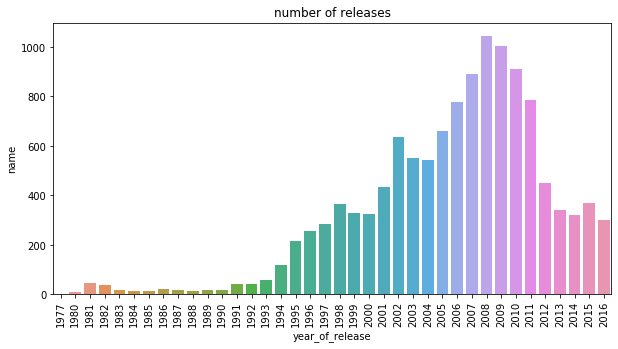

In [48]:
plt.subplots(figsize=(10, 5))
plot = sns.barplot(data=games_year, x= 'year_of_release', y= 'name')
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plot.set(title='number of releases')
plot

Пропусков по годам мало. По крайней мере, если судить по имеющимся данным, после пика в 2008-м количество выпускаемых игр сильно упало и стагнирует с 2013-го года. Скорее всего, учитываются только игры от крупных компаний. Для составления прогноза для 2017 важны только последние года, которые относятся к текущему поколению игр.

### Распределение продаж по платформам

In [49]:
top_platforms = df[df['platform'] != 'PC'].groupby('platform')['total_sales'].sum().sort_values(ascending = False).reset_index()
top_platforms

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,3DS,259.00


Первая актуальная платформа в топе для 2016 года — XOne, последняя — PSV. Они обязательно должны быть в графике, чтобы было видно переход между поколениями. PC не берём в рассчёт по понятным причинам. Возмём самые популярные 22 платформы из имеющихся.

In [50]:
platform_year_sales_df = df[df['platform'].isin(top_platforms['platform'].head(22))].groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()
platform_year_sales_df['year_of_release'] = platform_year_sales_df['year_of_release'].astype('uint16')

In [51]:
platform_year_sales_df

,platform,year_of_release,total_sales
0,2600,1977,0.98
1,2600,1980,11.70
2,2600,1981,35.68
3,2600,1982,28.88
4,2600,1983,5.84
...,...,...,...
195,XB,2015,0.40
196,XOne,2013,18.96
197,XOne,2014,54.07
198,XOne,2015,60.14


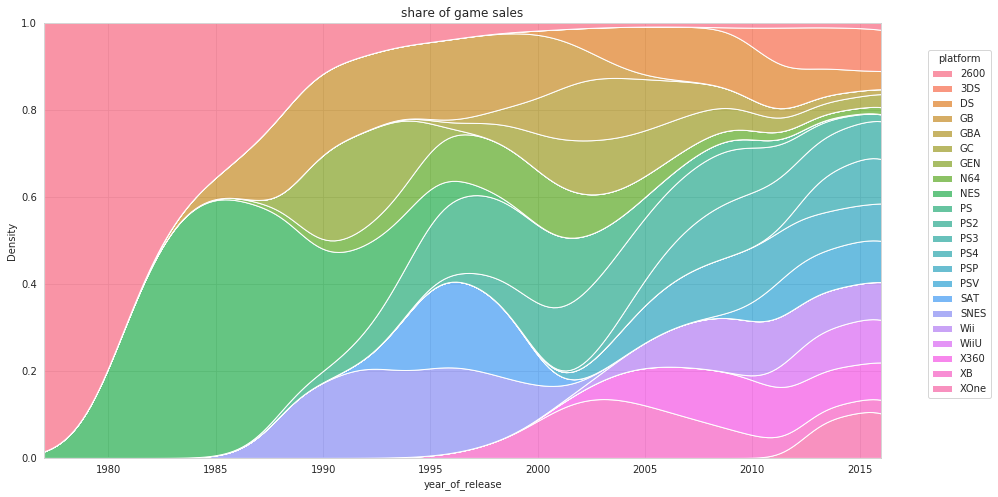

In [73]:
plt.subplots(figsize=(15, 8))
plot = sns.kdeplot(data=platform_year_sales_df, x="year_of_release", hue="platform", multiple="fill",cut = 0)
plot.legend_.set_bbox_to_anchor((1.05, 0.95))
plot.legend_._set_loc(2)
plot.set(title='share of game sales')
sns.set_style("whitegrid")
plot

График не очень удобный из-за громоздкости с точки зрения читаемости и разбора по платформам, но вполне подходит для оценки сроков жизни платформ. Новые платформы появляются раз в 6-7 лет, при этом популярные старые могут прекрасно себя чувствовать 10-15 лет. В среднем за актуальный период можно взять 10 лет. Посмотрим самые платформы с самыми высокими продажами в этот период.

In [78]:
platform_year_sales_df[platform_year_sales_df['year_of_release'] > 2006].groupby('platform')['total_sales'].sum().sort_values(ascending = False).reset_index()


,platform,total_sales
0,PS3,917.89
1,X360,909.44
2,Wii,763.36
3,DS,537.65
4,PS4,314.14
5,3DS,258.24
6,PSP,185.35
7,PS2,165.24
8,XOne,159.32
9,WiiU,82.19


Построим график плотности продаж для одиннадцати самых популярных платформ.

In [54]:
period_sales_df = platform_year_sales_df[platform_year_sales_df['platform'].isin(top_period['platform'].head(11))]
period_sales_df = period_sales_df.drop(period_sales_df[period_sales_df['year_of_release'] < 2007].index)

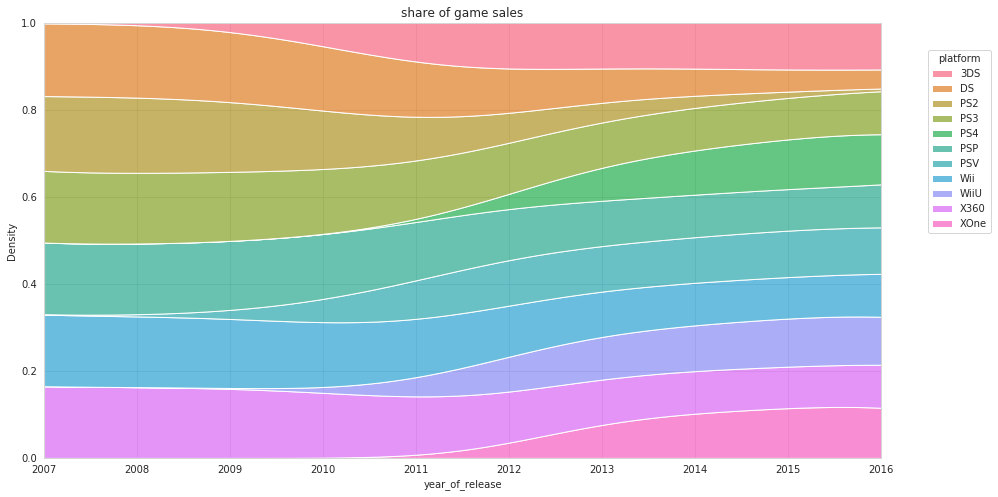

In [77]:
plt.subplots(figsize=(15, 8))
plot = sns.kdeplot(data=period_sales_df, x="year_of_release", hue="platform", multiple="fill",cut = 0)
plot.legend_.set_bbox_to_anchor((1.05, 0.95))
plot.legend_._set_loc(2)
plot.set(title='share of game sales')
sns.set_style("whitegrid")
plot

Растут доли рынка у новых платформах: PS4, WiiU, XOne.
<br>
Не теряют актуальности: 3DS, PSV
<br>
Теряют актуальность: DS, PS3, Wii, X360, PSP
<br>
PS2 Завершила свой жизненный цикл.

Наибольший потенциал у более новых платформ PS4, WiiU, XOne, 3DS, PSV.

Убираем все неактуальные данные, сохранив полные данные для проверки гипотез.

In [56]:
df_old = df
df = df.drop(df[(df['year_of_release'] < 2007) | 
                (pd.isna(df['year_of_release'])) | 
                ~(df['platform'].isin(top_period['platform'].head(11)))].index)
df['year_of_release'] = df['year_of_release'].astype('uint16')
df['year_of_release'].describe()

count    8668.000000
mean     2010.451200
std         2.673329
min      2007.000000
25%      2008.000000
50%      2010.000000
75%      2012.000000
max      2016.000000
Name: year_of_release, dtype: float64

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


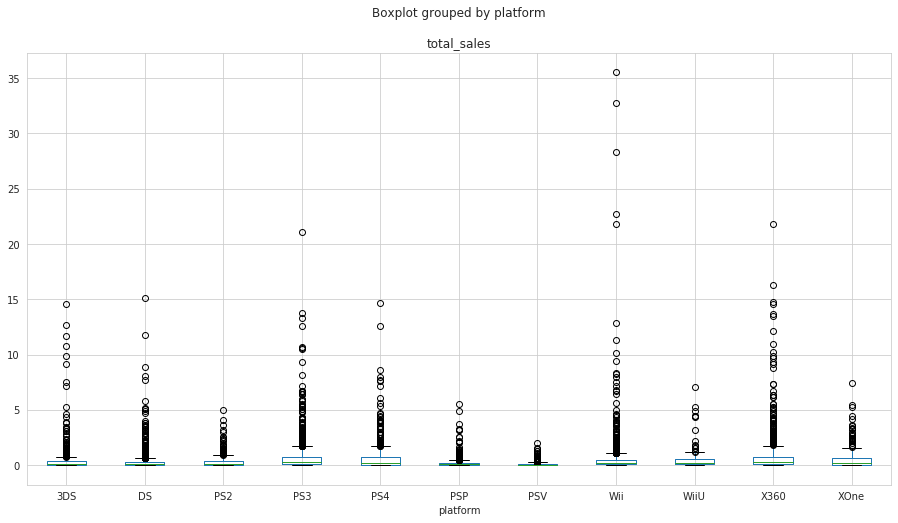

In [57]:
df.boxplot('total_sales', by='platform', figsize = (15,8))

По графику видно, что подавляющее большнинство выходящих игр никогда не дотягивает по продажам даже до миллиона, а доля хитов с многомиллионными тиражами настолько мала, что они отображаются на графике как выбросы.

### Зависимость продаж от отзывов

Найдём платформу с наиболее полными данными.

In [79]:
top_platforms = df[pd.notna(df['user_score']) & pd.notna(df['critic_score'])].groupby('platform')['total_sales'].count().sort_values(ascending = False).reset_index()
top_platforms

,platform,total_sales
0,X360,784
1,PS3,769
2,Wii,455
3,DS,331
4,PS4,250
5,PSP,217
6,XOne,165
7,3DS,159
8,PSV,118
9,PS2,112


Самые многочисленные данные у X360.

In [59]:
x360_df = df[df['platform'] == 'X360']

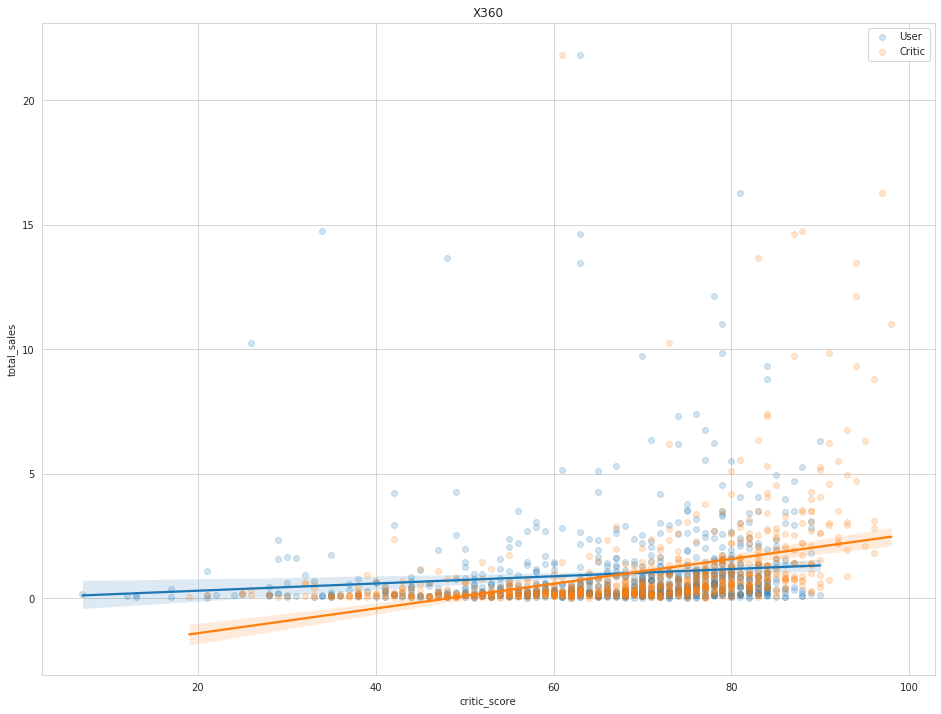

In [80]:
plt.subplots(figsize=(16, 12))
#sns.scatterplot(data=df, x='user_score', y='total_sales', alpha = 0.3)
#sns.scatterplot(data=df, x='critic_score', y='total_sales', alpha = 0.3)
user_plot = sns.regplot(data=x360_df, x="user_score", y="total_sales", scatter_kws={'alpha':0.2}, label='User')
user_plot.legend(loc="best")
user_plot.set(title='X360')
critic_plot = sns.regplot(data=x360_df, x="critic_score", y="total_sales", scatter_kws={'alpha':0.2}, label='Critic')
critic_plot.legend(loc="best")


Пользовательские оценки более сдержанные, выше девяти не была оценена ни одна игра. По тренду видно, что оценки критиков для продаж важнее.

In [84]:
x360_df['total_sales'].corr(x360_df['critic_score'])

0.3980530755688185

In [85]:
x360_df['total_sales'].corr(x360_df['user_score'])

0.11439743236300504

От пользовательских оценок продажи почти не зависят. Намного больше влияют оценки критиков.

Рассмотрим распределения у других популярных платформ.

PS3


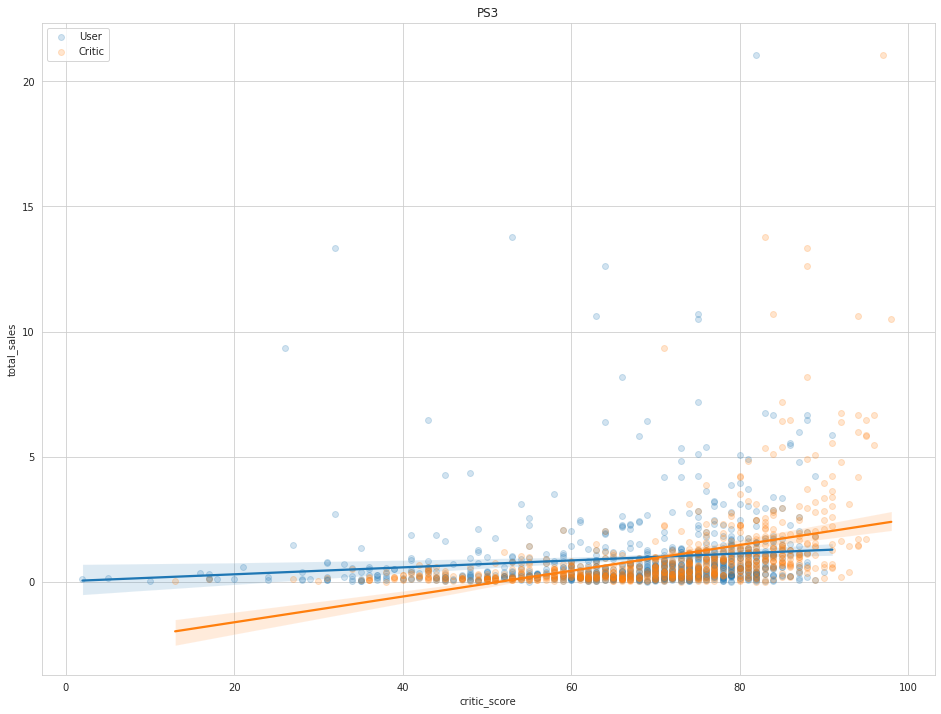

Коэффициент корреляции продаж с оценкой критиков:
0.43321526627904783
Коэффициент корреляции продаж с оценкой игроков:
0.12511825471378293
_____________________________________________

Wii


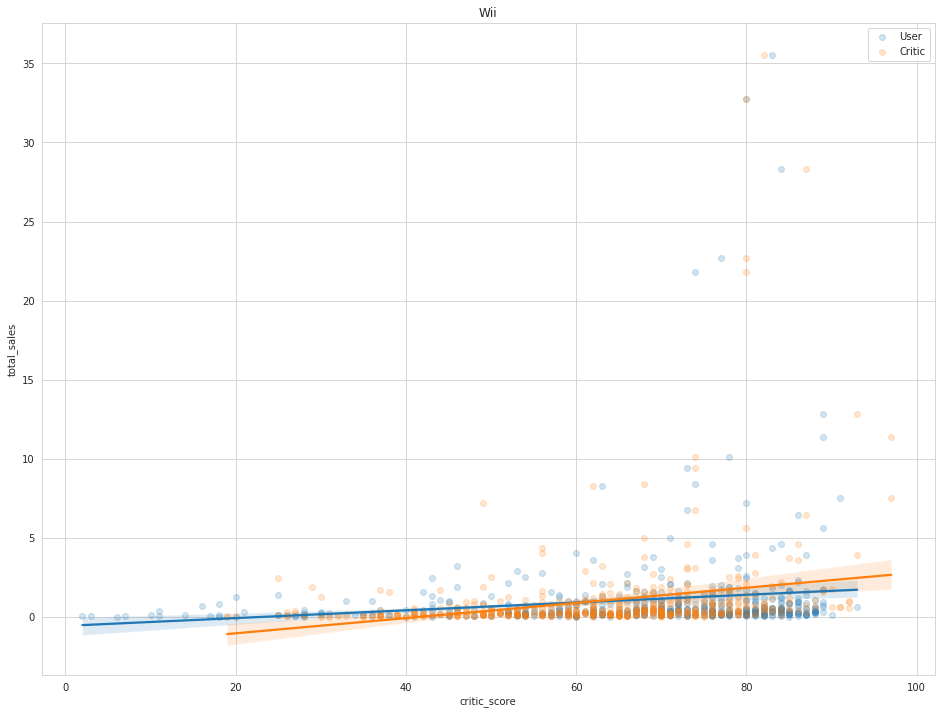

Коэффициент корреляции продаж с оценкой критиков:
0.2375884249743896
Коэффициент корреляции продаж с оценкой игроков:
0.14100729121041453
_____________________________________________

DS


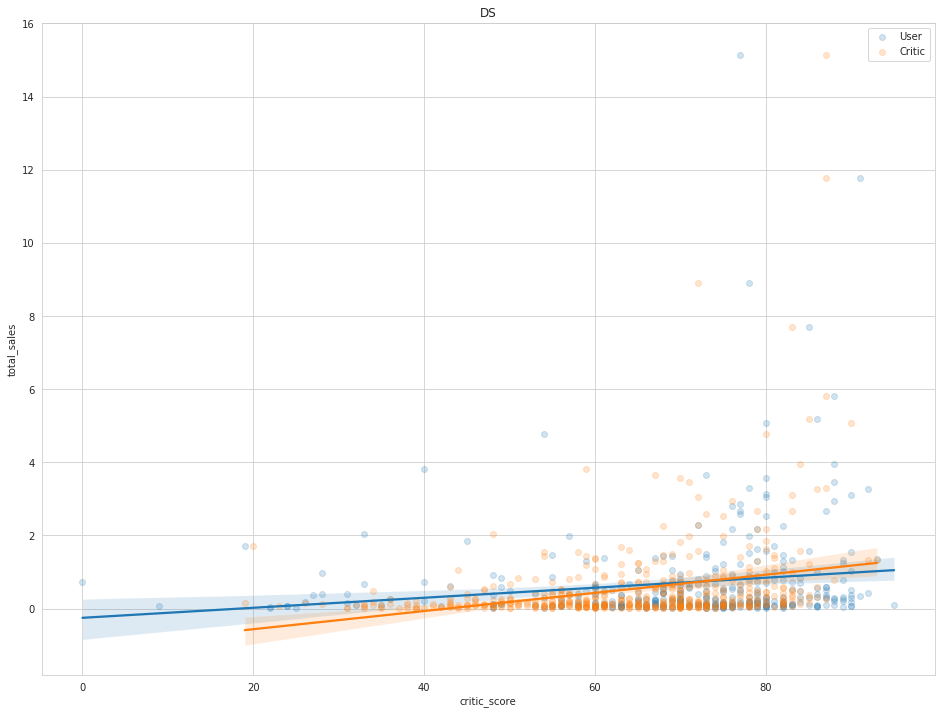

Коэффициент корреляции продаж с оценкой критиков:
0.27535322364211134
Коэффициент корреляции продаж с оценкой игроков:
0.14649756797727465
_____________________________________________

PS4


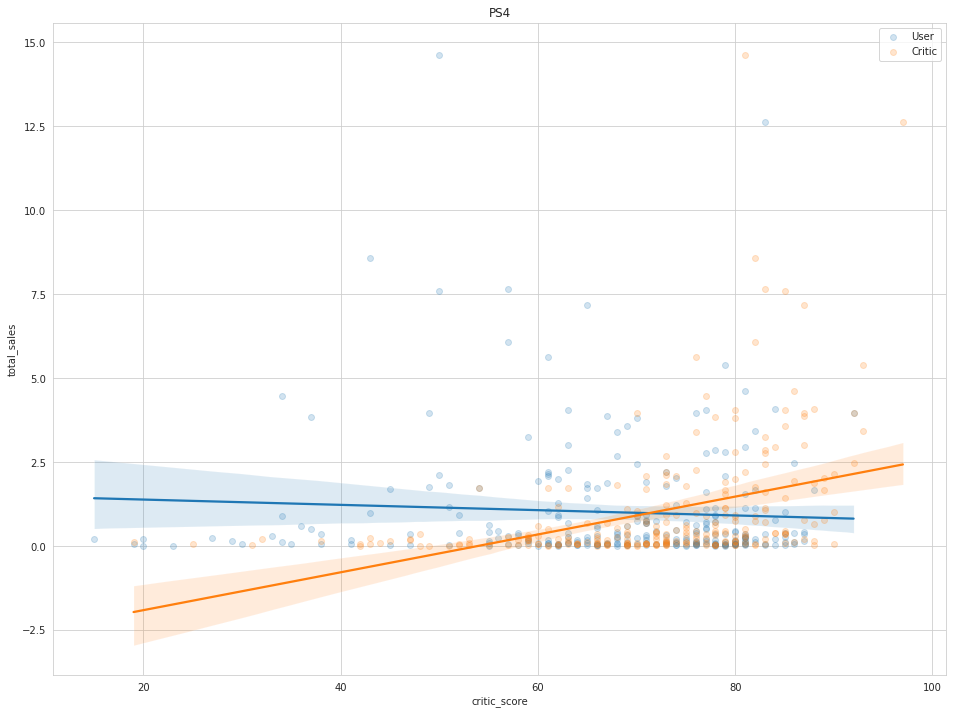

Коэффициент корреляции продаж с оценкой критиков:
0.38049417628350607
Коэффициент корреляции продаж с оценкой игроков:
-0.06281554656059007
_____________________________________________

PSP


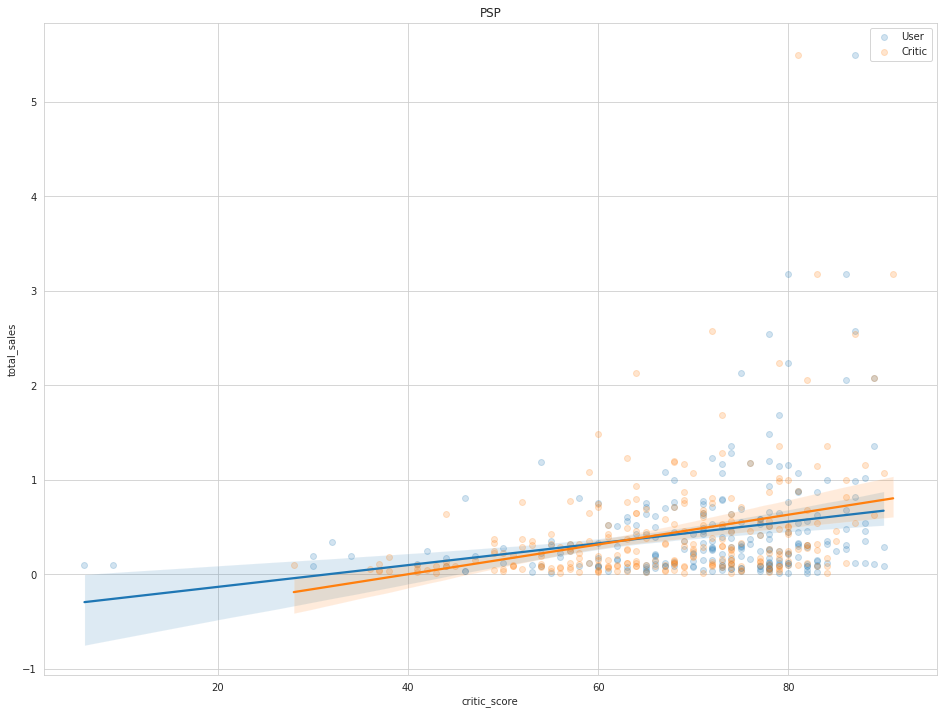

Коэффициент корреляции продаж с оценкой критиков:
0.3253886263926826
Коэффициент корреляции продаж с оценкой игроков:
0.24354783286708065
_____________________________________________

XOne


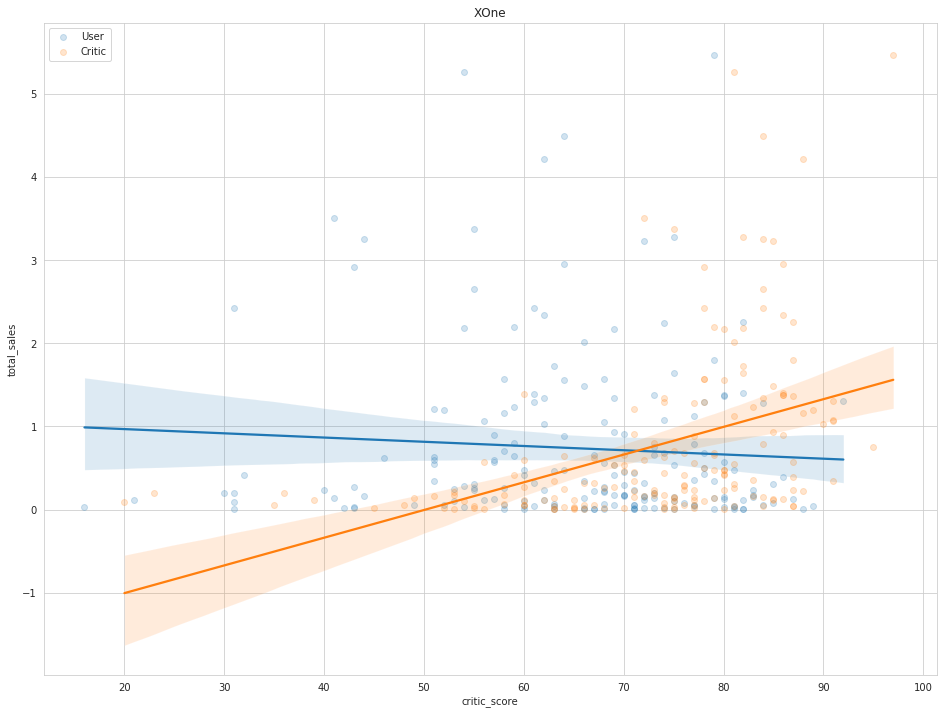

Коэффициент корреляции продаж с оценкой критиков:
0.41699832800840175
Коэффициент корреляции продаж с оценкой игроков:
-0.06892505328279411
_____________________________________________

3DS


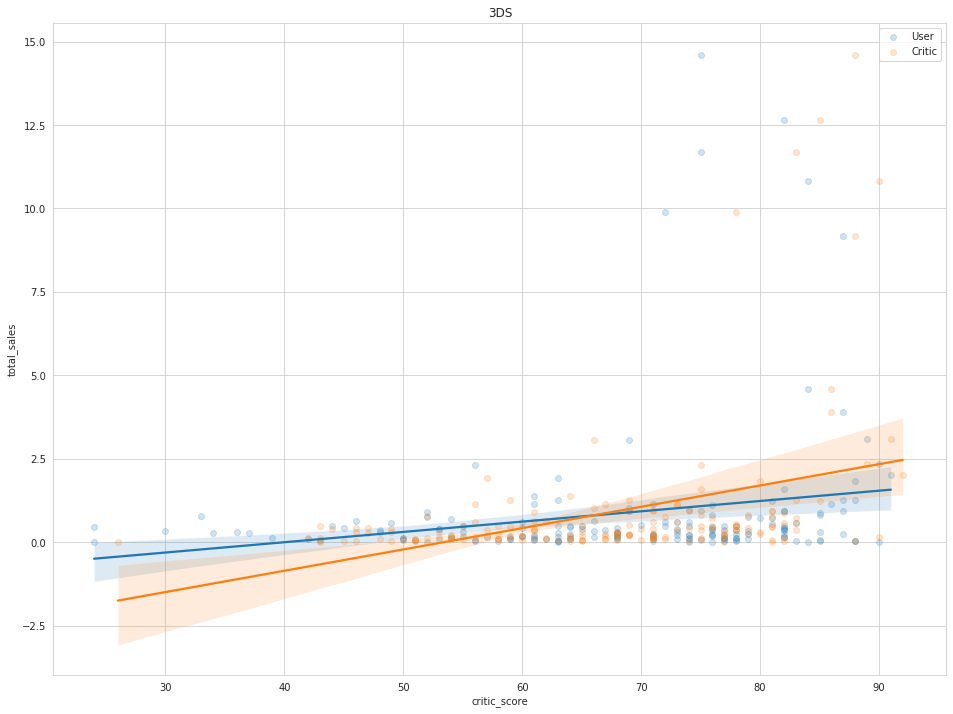

Коэффициент корреляции продаж с оценкой критиков:
0.36856629468985097
Коэффициент корреляции продаж с оценкой игроков:
0.20394383948403733
_____________________________________________

PSV


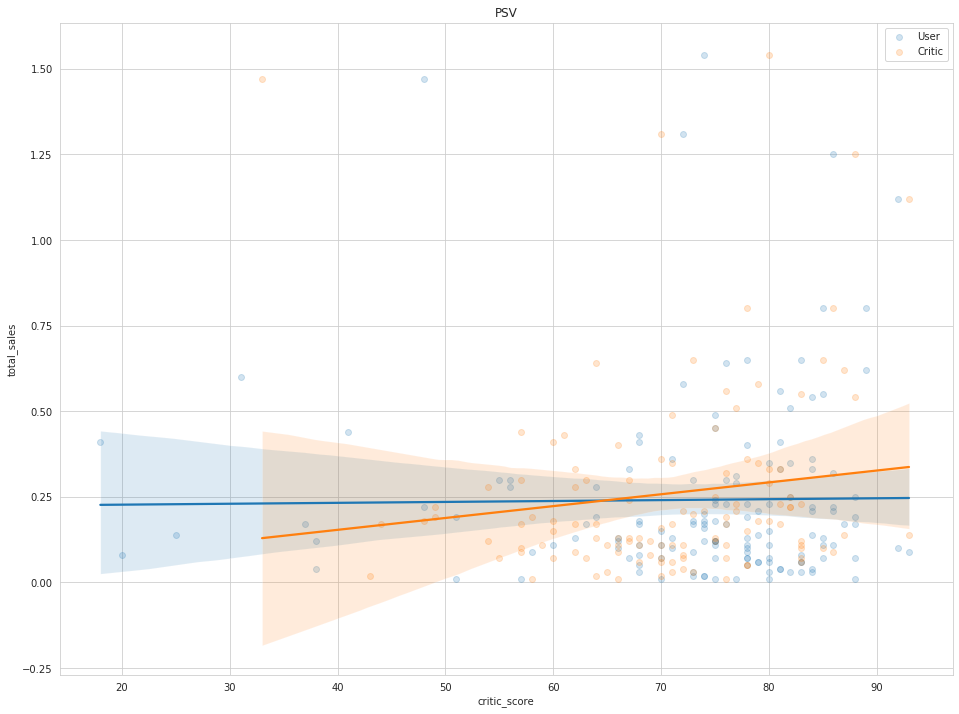

Коэффициент корреляции продаж с оценкой критиков:
0.13176292727608935
Коэффициент корреляции продаж с оценкой игроков:
0.013488756835886512
_____________________________________________

PS2


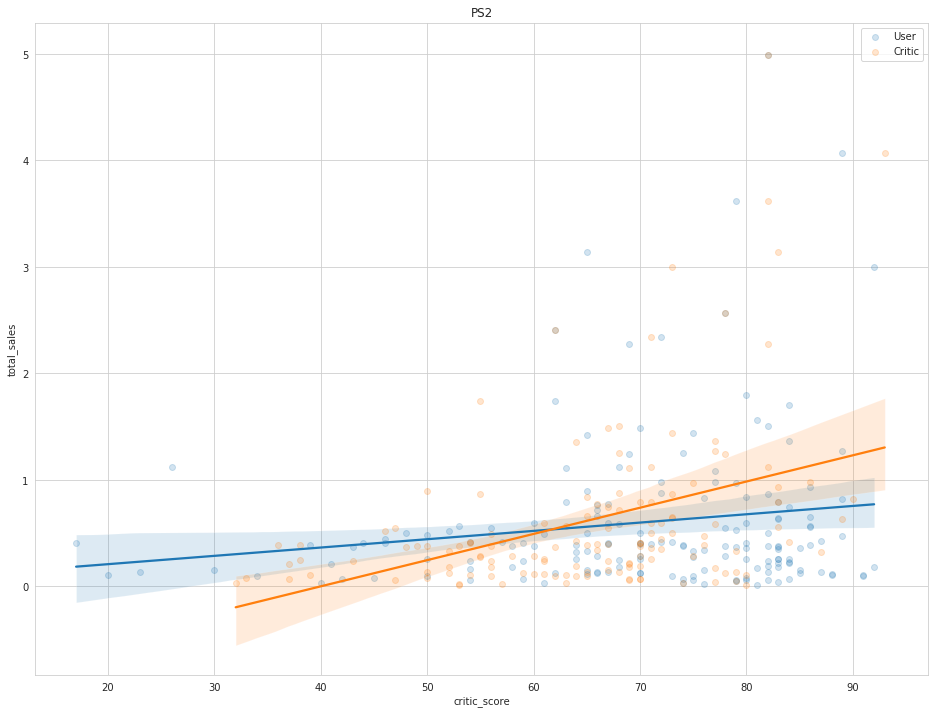

Коэффициент корреляции продаж с оценкой критиков:
0.3880531298180612
Коэффициент корреляции продаж с оценкой игроков:
0.156977090262555
_____________________________________________

WiiU


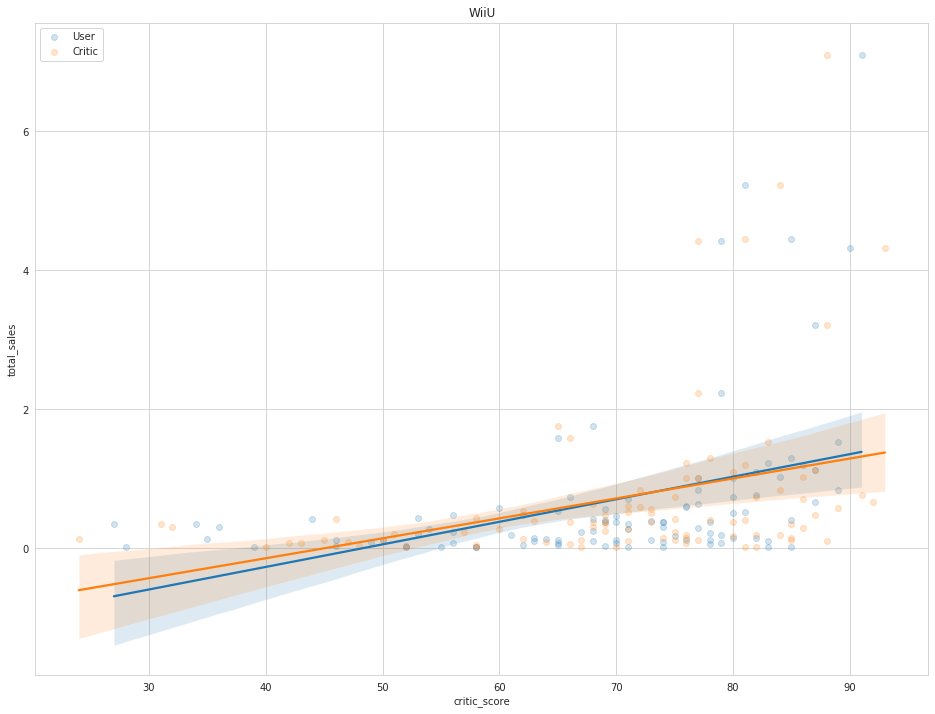

Коэффициент корреляции продаж с оценкой критиков:
0.3483797601201749
Коэффициент корреляции продаж с оценкой игроков:
0.4002190202148618
_____________________________________________



In [88]:
for platform in top_platforms['platform'].tail(10):
    print(platform)
    plt.subplots(figsize=(16, 12))
    user_plot = sns.regplot(data=df[df['platform'] == platform], x="user_score", y="total_sales", scatter_kws={'alpha':0.2}, label='User')
    user_plot.legend(loc="best")
    user_plot.set(title=platform)
    critic_plot = sns.regplot(data=df[df['platform'] == platform], x="critic_score", y="total_sales", scatter_kws={'alpha':0.2}, label='Critic')
    critic_plot.legend(loc="best")
    plt.show()
    
    print('Коэффициент корреляции продаж с оценкой критиков:')
    print(df[df['platform'] == platform]['total_sales'].corr(df[df['platform'] == platform]['critic_score']))
    print('Коэффициент корреляции продаж с оценкой игроков:')
    print(df[df['platform'] == platform]['total_sales'].corr(df[df['platform'] == platform]['user_score']))
    print('_____________________________________________\n')

У всех платформ, кроме WiiU оценка критиков имеет большее значение для продаж.

### Анализ жанров

Поскольку качество и продажи у разных игр разные, многое зависит от бюджетов и рекламы, считать среднее по жанру нет никакого смысла. Более значимым показателем общей прибыльности и популярности будет абсолютная сумма продаж за весь актуальный период.

In [63]:
genres_sales = df.groupby('genre')['total_sales'].sum().sort_values(ascending = False)
genres_sales

genre
Action          1037.20
Sports           652.01
Shooter          648.40
Misc             494.45
Role-Playing     429.72
Racing           263.65
Platform         230.57
Simulation       172.80
Fighting         165.96
Adventure        125.88
Puzzle            78.95
Strategy          47.04
Name: total_sales, dtype: float64

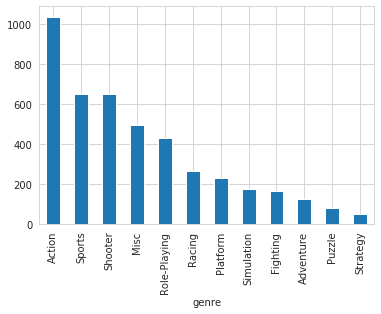

In [64]:
genres_sales.plot.bar()

Наибольшей популярностью с большим отрывом пользуется Action, второе и третье место делят спортивные игры и шутеры, наименее популярны Adventure, Puzzle и Strategy.

## Портрет пользователей в регионах

### Самые популярные платформы в регионах

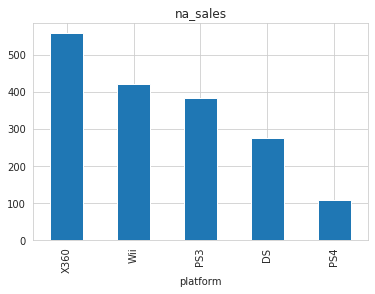

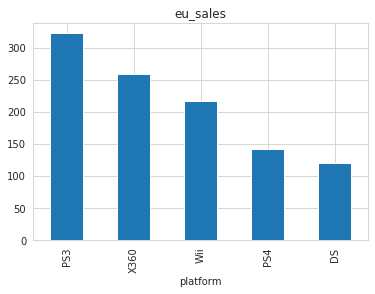

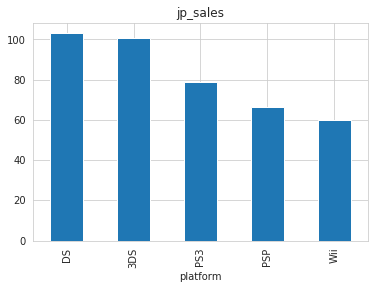

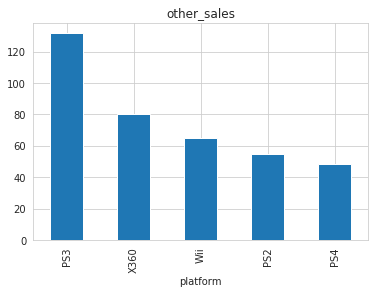

In [65]:
for region in df.loc[:,'na_sales':'other_sales']:
    df.groupby('platform')[region].sum().sort_values(ascending = False).head(5).plot.bar(title=region)
    plt.show()

В Северной Америке предпочитают домашние платформы, причём у X360 продаж на четверть больше, чем у Wii и PS3.
<br>
В Европе тоже лидируют домашнии, но отрыв лидера PS3 не такой значительный.
<br>
В Японии предпочитают платформы собственного производства, причём лидарство за портативными платформами.
<br>
В остальном мира PS3 почти в два раза популярней ближайшего конкурента в лице X360.

### Самые популярные жанры в регионах

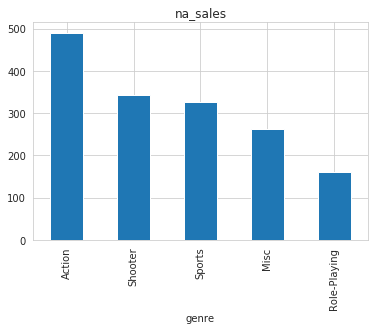

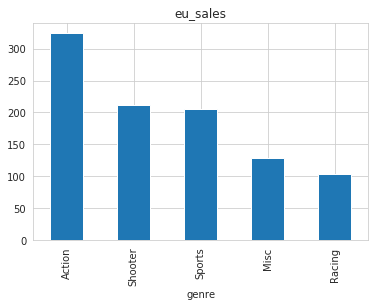

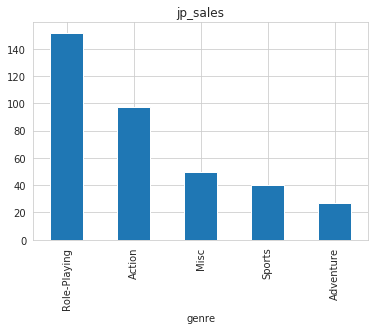

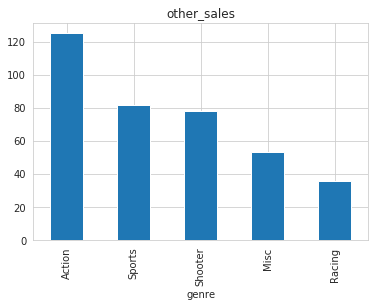

In [66]:
for region in df.loc[:,'na_sales':'other_sales']:
    df.groupby('genre')[region].sum().sort_values(ascending = False).head(5).plot.bar(title=region)
    plt.show()

Во всём мире, кроме Японии, предпочтения по жанрам почти одинаковые: в первой тройке Action, Shooter, Sports, причём Action всегода лидирует со значительным отрывом. Только в Японии лижирует Role-Playing, возможно, именно этот жанр доминирует на портативных устройствах.

### Влияние рейтинга ESRB на продажи в регионах

Для более точного сравнения возмём только те игры, у которых известны рейтинги и которые выходили во всех регионах, то есть продажи везде больше 0, причём рейтинги, чтобы не портить статистику играми, выходящими только в отдельных регионах. 

In [67]:
df_all_sales = df[(df['na_sales'] > 0) & (df['eu_sales'] > 0) & (df['jp_sales'] > 0) & (df['other_sales'] > 0) & (~pd.isna(df['rating']))].loc[:,'na_sales':'other_sales']
df_all_sales['total_sales'] = df['total_sales']
df_all_sales['rating'] = df['rating']

Найдём доли продажи каждой игры в регионе.

In [68]:
for region in df.loc[:,'na_sales':'other_sales']:
    df_all_sales[region+'_rate'] = df[region] / df['total_sales']

Сравним медианные значения.

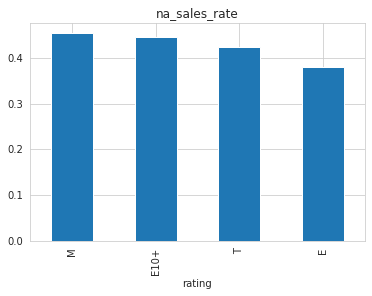

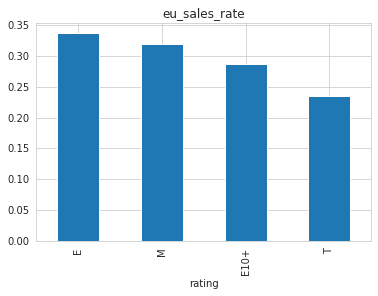

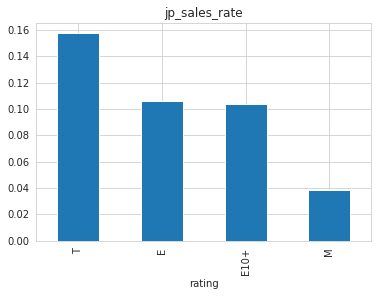

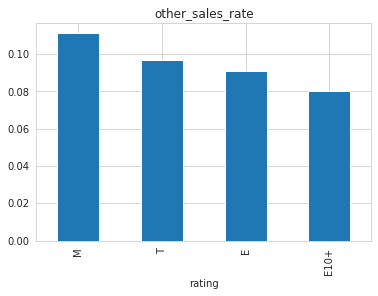

In [69]:
for region in df_all_sales.loc[:,'na_sales_rate':'other_sales_rate']:
    plot_sum = df_all_sales.groupby('rating')[region].median().sort_values(ascending = False).plot.bar(title=region)
    plt.show()
    

В Северной Америке рейтинг почти не влияет на продажи, хотя Е продаётся чуть хуже.
<br>
В Европе в целом тоже, кроме пониженных продаж игр с рейтингом Т
<br>
В Японии лучше всего продаются игры с рейтингом Т, а хуже всего с М.
<br>
В остальном мире отдают предпочтение играм с более высоким возрастным рейтингом, однако разницу нельзя назвать критической.


## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гиротеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Данных по ценкам пользователй для PC за актуальный период нет вообще, поэтому берём полные данные.

In [70]:
alpha = 0.05

results = st.ttest_ind(df_old[df_old['platform'] == 'PC']['user_score'], df_old[df_old['platform'] == 'XOne']['user_score'], nan_policy = 'omit')

print('p-значение:', results.pvalue)

if results.pvalue >= alpha:
    print('Нулевая гиротеза подтвердилась')
else:
    print('Нулевая гипотеза опровергнута.') 

p-значение: 1.3896435533545967e-05
Нулевая гипотеза опровергнута.


Средние пользовательские оценки на платформах разнятся.

### Средние пользовательские рейтинги жанров Action и Sports разные.

Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports одинаковые.
<br>
Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports разные.

In [71]:
alpha = 0.05

results = st.ttest_ind(df_old[df_old['genre'] == 'Action']['user_score'], df_old[df_old['genre'] == 'Sports']['user_score'], nan_policy = 'omit')

print('p-значение:', results.pvalue)

if results.pvalue >= alpha:
    print('Нулевая гиротеза подтвердилась')
else:
    print('Нулевая гипотеза опровергнута.') 

p-значение: 0.09998703925490361
Нулевая гиротеза подтвердилась


Нулевая гипотеза подтвердилась, значит средние пользовательские оценки у жанров одинаковые.

## Общий вывод

Качество данных оставляет желать лучшего, но по их анализу были определены новые набирающие популярность платформы и всё ещё достаточно популярные старые, было выяснено, что оценки критиков имеют большое значение для продаж, а пользовательские почти не имеют, были выявлены по регионам самые популярные платформы, жанры, а также зависимость продаж в регионах от возрастного рейтинга, самым отличающимся регионом является Япония.